# Loading Libraries

In [362]:
import pandas as pd
import os
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

# Define functions

In [379]:
categories = ["API", "Comms", "DevOps", "Engage", "Investor", "Issuer", "Payments", "No"]

In [373]:
def plot_pod(pod_name, dataset):
    plt.figure().clear()
    plt.close()
    plt.cla()
    plt.clf()
    
    df = dataset[dataset['Team'] == pod_name]
    header = ['api', 'comms', 'devops', 'engage', 'investor', 'issuer', 'payments']
    labels = df["Participant Name"].unique().tolist()

    api = df[df["Category"] == "API"]['Answered Correct'].tolist()
    comms = df[df["Category"] == "Comms"]['Answered Correct'].tolist()
    devops = df[df["Category"] == "DevOps"]['Answered Correct'].tolist()
    engage = df[df["Category"] == "Engage"]['Answered Correct'].tolist()
    investor = df[df["Category"] == "Investor"]['Answered Correct'].tolist()
    issuer = df[df["Category"] == "Issuer"]['Answered Correct'].tolist()
    payments = df[df["Category"] == "Payments"]['Answered Correct'].tolist()
    
    output = 'Correct Answers'
    X_AXIS = labels
    
    matplotlib.rc('font', serif='Helvetica Neue')
    matplotlib.rc('text', usetex='false')
    matplotlib.rcParams.update({'font.size': 40})
    
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    
    configs = labels
    N = len(configs)
    ind = np.arange(N)
    width = 0.4
    buttom = api
    
    p1 = plt.bar(ind, api, width, color='r')
    p2 = plt.bar(ind, comms, width, bottom=buttom, color='b')
    buttom += np.array(comms)
    p3 = plt.bar(ind, devops, width, bottom=buttom, color='g')
    buttom += np.array(devops)
    p4 = plt.bar(ind, engage, width, bottom=buttom, color='c')
    buttom += np.array(engage)
    p5 = plt.bar(ind, investor, width, bottom=buttom, color='orange')
    buttom += np.array(investor)
    p6 = plt.bar(ind, issuer, width, bottom=buttom, color='black')
    buttom += np.array(issuer)
    p7 = plt.bar(ind, payments, width, bottom=buttom, color='teal')
    
    plt.ylim([0,35])
    plt.yticks(fontsize=12)
    plt.ylabel(output, fontsize=12)
    plt.title(f"{pod_name} Results")
    plt.xticks(ind, X_AXIS, fontsize=12, rotation=90)
    plt.xlabel('Participants', fontsize=12)
    plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), (header[0], header[1], header[2], header[3], header[4], header[5], header[6]), fontsize=12, ncol=4, framealpha=0, fancybox=True)
    
    return plt

In [374]:
def load_data(filename, category):
    df = pd.read_csv(f"{path}/{filename}")
    df = df.drop(columns=['Participant ID', 'Joined (GMT)', 'Rank'])
    df['Category'] = category
    df = df.sort_values(by=['Team'])
    return df

# Loading Data

In [375]:
path = "/Users/kevindorfer/Documents/Tech Trivia"
os.listdir(path)

['MultiGamePlayerRankingsExport_09302022_12-29PM.csv',
 '.DS_Store',
 'dealmaker-tech-trivia-results-30-09-2022.csv',
 'Engage-30-09-2022.png',
 'Issuer-30-09-2022.png',
 'Payments_PlayerRankingsExport_09302022_12-32PM.csv',
 'Payments-30-09-2022.png',
 'Investor_PlayerRankingsExport_09302022_12-31PM.csv',
 'API-30-09-2022.png',
 'TeamRankingsExport_09302022_12-19PM.csv',
 'DevOps_PlayerRankingsExport_09302022_12-29PM.csv',
 'Issuer_PlayerRankingsExport_09302022_12-31PM (1).csv',
 'API_PlayerRankingsExport_09302022_12-20PM.csv',
 'Comms_PlayerRankingsExport_09302022_12-27PM.csv',
 'Comms-30-09-2022.png',
 'Engage_PlayerRankingsExport_09302022_12-30PM.csv',
 'DevOps-30-09-2022.png',
 'Investor-30-09-2022.png']

In [376]:
api_category = load_data("API_PlayerRankingsExport_09302022_12-20PM.csv", "API")
comms_category = load_data("Comms_PlayerRankingsExport_09302022_12-27PM.csv", "Comms")
devops_category = load_data("DevOps_PlayerRankingsExport_09302022_12-29PM.csv", "DevOps")
engage_category = load_data("Engage_PlayerRankingsExport_09302022_12-30PM.csv", "Engage")
investor_category = load_data("Investor_PlayerRankingsExport_09302022_12-31PM.csv", "Investor")
issuer_category = load_data("Issuer_PlayerRankingsExport_09302022_12-31PM (1).csv", "Issuer")
payments_category = load_data("Payments_PlayerRankingsExport_09302022_12-32PM.csv", "Payments")

In [377]:
results = pd.concat([api_category, comms_category, devops_category, engage_category, investor_category, issuer_category, payments_category])
results.reset_index(drop=True, inplace=True)
sorted_results = results.sort_values(by=['Team', 'Category', 'Participant Name'])
curr_date = pd.to_datetime('today').date().strftime("%d-%m-%Y")
sorted_results['Date'] = curr_date
col_list = ['Date', 'Team', 'Category', 'Participant Name', 'Email', 'Points', 'Percent Correct', 'Total Questions', 'Total Answered', 'Answered Correct']
sorted_results = sorted_results[col_list]

In [371]:
sorted_results.to_csv(f"{path}/dealmaker-tech-trivia-results-{curr_date}.csv")

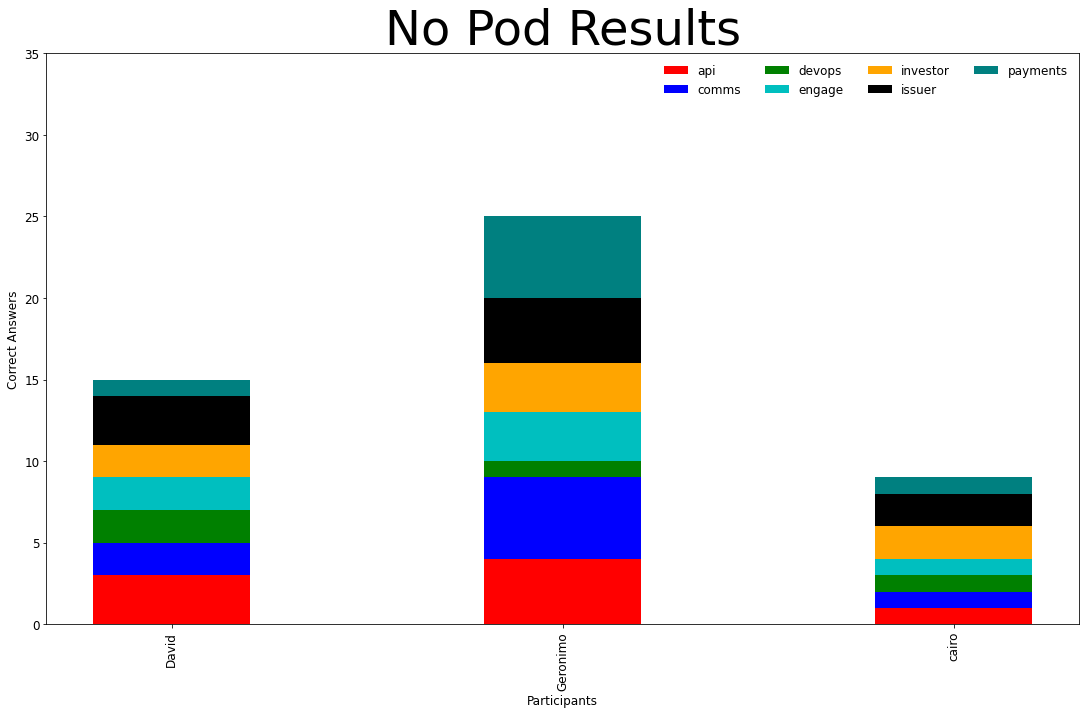

In [380]:
for cat in categories:
    result = plot_pod(f'{cat} Pod', sorted_results)
    result.savefig(f'{path}/{cat}-{curr_date}.png')